# Libraries

This section shows the imported libraries used for developing this program. Of which includes:
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Sklearn





In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Analysis

In this section, data analysis is performed. The analysis made are:
* Reading the data
* Checking for missing values
* Viewing data characteristics


In [ ]:
#read data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/House Pricing.csv")

In [ ]:
#show data
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#Check for missing values
print("Missing Values by Column")
print("-"*30)
print(data.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES: ", data.isna().sum().sum())

Missing Values by Column
------------------------------
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
------------------------------
TOTAL MISSING VALUES:  0


In [ ]:
#view data characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Further Analysis and Preprocessing
In this section, further analysia and preprocessing is performed. These include:
* Replacing "yes' and "no" values with '1' and '0'
* Encoding "furnishing status" feature as separated boolean features, represented as "furnished", "semi-furnished", "unfurnished"
* Scaling the area and price column into values between 0-1
* Plotting scatter graphs and heatmaps to visualize the relationship between features and target 
* Splitting the data for training and testing

In [ ]:
#replace "yes" and "no" values with "1" and "0"
data = data.applymap(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

#extract furnishing status feature and encode as separate features
#dropping furnishing status feature, join new features
data = data.join(pd.get_dummies(data.furnishingstatus)).drop(['furnishingstatus'], axis = 1)

In [ ]:
#Scale the area column 
scaler = MinMaxScaler()
scaled_area = scaler.fit_transform(data['area'].values.reshape(-1, 1))

data['area'] = scaled_area.reshape(-1)

# Scale the price column
scaled_price = scaler.fit_transform(data['price'].values.reshape(-1, 1))
data['price'] = scaled_price.reshape(-1)

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,1,0,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,1,0,0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,0,1,0
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,1,0,0
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,1,0,1,0,0,2,0,0,0,1
541,0.001485,0.051546,3,1,1,0,0,0,0,0,0,0,0,1,0
542,0.000000,0.135395,2,1,1,1,0,0,0,0,0,0,0,0,1
543,0.000000,0.086598,3,1,1,0,0,0,0,0,0,0,1,0,0


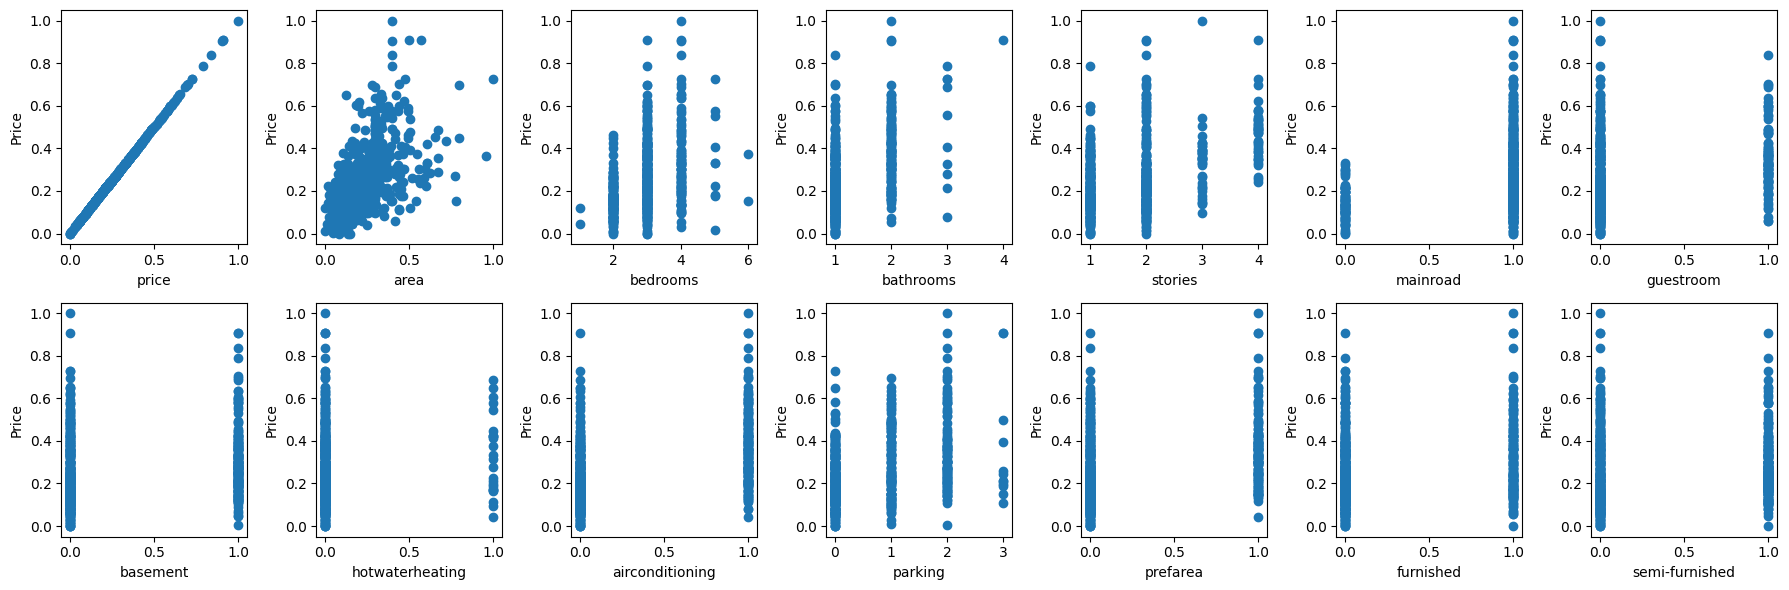

In [ ]:
# Loop through each feature column and create a scatter plot with respect to 'price'

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(18,6))

for col, ax in zip(data.columns[:-1], axes.flatten()):
    ax.scatter(data[col], data['price'])
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()


In [ ]:
#Splitting data for features and label into X and Y
X = data.drop(['price'], axis = 1)
Y = data['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

train_data = X_train.join(Y_train)
test_data = X_test.join(Y_test)

<Axes: >

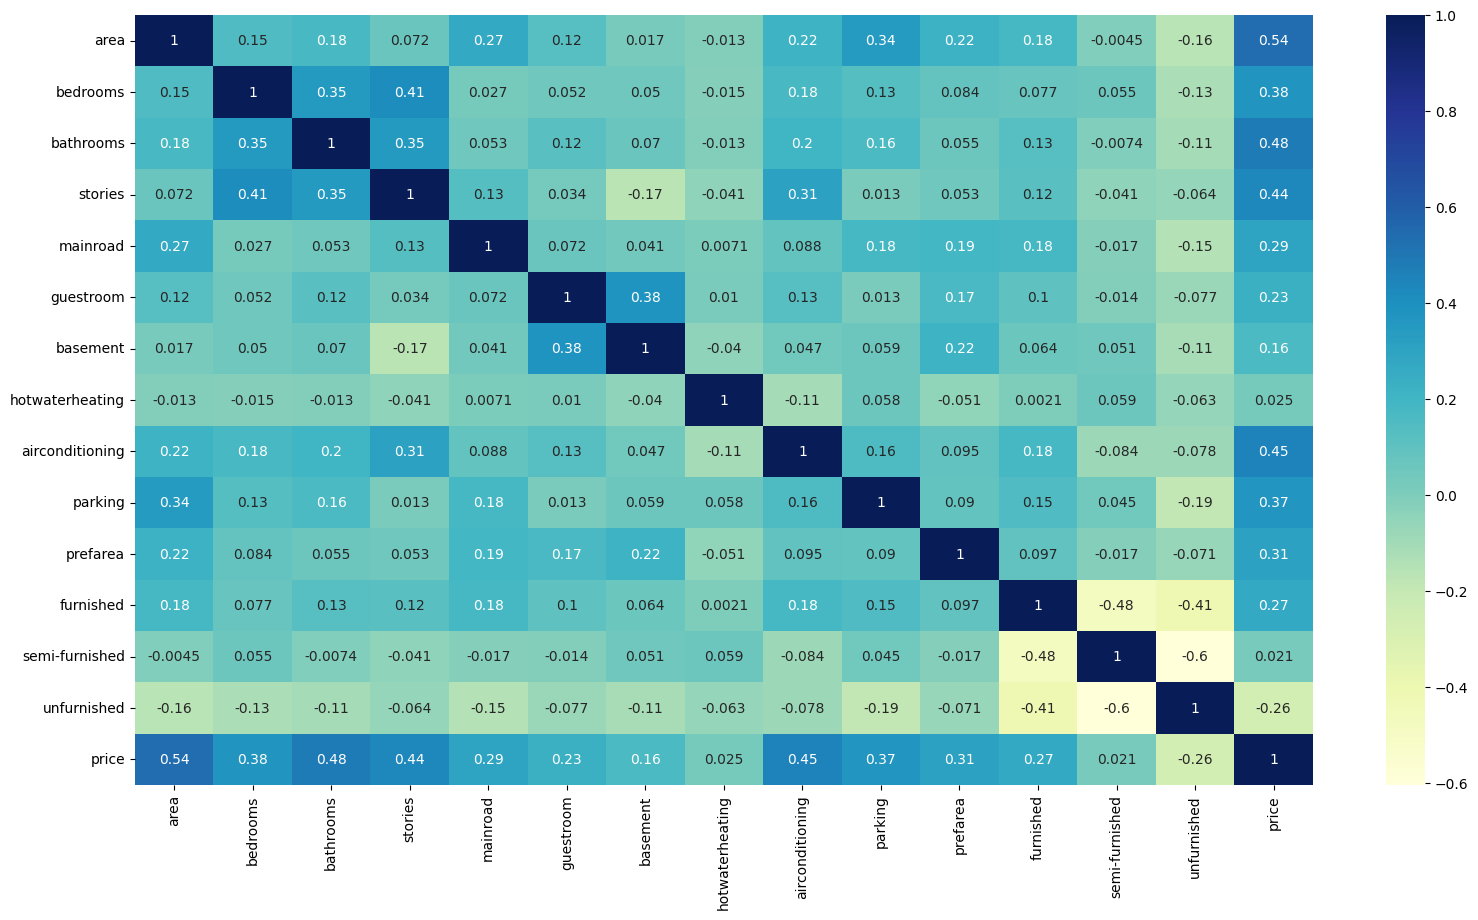

In [ ]:
plt.figure(figsize=(19, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#Regression Model Development
In this section, some features were eliminated using a correlation threshold of 0.32; this threshold is decided based on the analysis of the heatmap above.
The data is trained and tested using several models including:
* Linear Regression
* Random Forest Regressor
* Ridge Regressor
* Lasso Regressor

The random forest regressor yeild the highest training score at 0.759. Following that, an attempt to tune the hyperparameter before retraining and testing has unfortunately slightly worsened the score. 

All results are shown below along with their RMSE.

In [ ]:
# Calculate correlation matrix for feature selctions
corr_matrix = train_data.corr()

# Define correlation coefficient threshold
#this threshold is chosen base on the heatmap above
corr_threshold = 0.32

# Get absolute correlation coefficients for the target variable
price_corr = corr_matrix['price'].abs()

# Select features with correlation coefficient above the threshold
selected_features = price_corr[price_corr >= corr_threshold].index.tolist()

# Print selected features
print(selected_features)


['area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning', 'parking', 'price']


In [ ]:
# Train and test data on linear regression model
X_train, Y_train = train_data.drop(['price'], axis=1), train_data['price']
X_test, Y_test = test_data.drop(['price'], axis=1), test_data['price']

reg = LinearRegression()
reg.fit(X_train, Y_train)

# Make predictions on test set and calculate RMSE
Y_pred = reg.predict(X_test)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

# Print RMSE and score
print("Linear Regression RMSE:", rmse)
print("Score:", reg.score(X_test, Y_test))


Linear Regression RMSE: 0.08566379136368509
Score: 0.7429308023335277


In [ ]:
# Train and test data on Random Forest Regressor
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

# Make predictions on test set and calculate RMSE
Y_pred = forest.predict(X_test)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

# Print RMSE and score
print("Forest Regression RMSE:", rmse)
print("Score:", forest.score(X_test, Y_test))


Forest Regression RMSE: 0.08290922359929587
Score: 0.7591974093110111


In [ ]:
# Attempt to tune parameters using grid search and retrain with Random forest Regressor
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [30, 50, 80],
    "max_features" : [2, 4, 6], 
    "min_samples_split" : [6, 8, 10, 12],
    "max_depth" : [None, 4, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_train, Y_train)

best_forest = grid_search.best_estimator_

# Calculate RMSE
Y_pred = best_forest.predict(X_test)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

# Print RMSE and score
print("Forest Regression RMSE:", rmse)
print("Score:", best_forest.score(X_test, Y_test))


Forest Regression RMSE: 0.09010016748188904
Score: 0.7156150200109104


In [ ]:
#Attempt to train and test data on ridge regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# create a Ridge regression object
ridge = Ridge(alpha=1.0)

# fit the model to the training data
ridge.fit(X_train, Y_train)

# make predictions on the test data
Y_pred = ridge.predict(X_test)

# calculate the root mean squared error
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("Ridge Regression RMSE:", rmse)
ridge.score(X_test, Y_test)

Ridge Regression RMSE: 0.08545682571729932


0.744171471703622

In [ ]:
#Attempt to train and test data on Lasso Regression

from sklearn.linear_model import Lasso

# create a Lasso regression object
lasso = Lasso(alpha=1.0)

# fit the model to the training data
lasso.fit(X_train, Y_train)

# make predictions on the test data
Y_pred = lasso.predict(X_test)

# calculate the root mean squared error
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("Lasso Regression RMSE:", rmse)
lasso.score(X_test, Y_test)

Lasso Regression RMSE: 1005622.4498622396


0.6964932878049125

#Model Evaluation
The follwing section shows an evalutation of the program above. The Predicted and actual prices are plotted as a scattered graph.

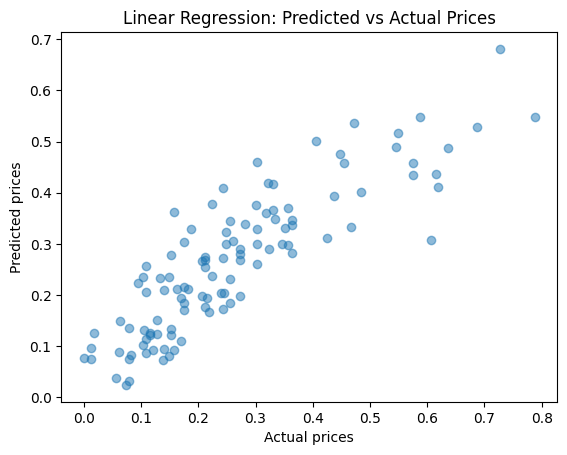

In [ ]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.show()


#Conclusion
Since the house prices from the dataset are quite spreaded out to begin with, it is quite challenging to produce high accuracy on the model's predction. Various preprocessing approaches were attempted prior to this program's version but yeild no improvement in the prediction score. 